# Pengaruh RMS Normalization pada FFNN

Pengujian ini bertujuan untuk menganalisis pengaruh RMS Normalization terhadap performa model FFNN

In [4]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

%load_ext autoreload
%autoreload 2

from model import FFNN
from activation import ReLU, Softmax
from loss import CategoricalCrossEntropy
from normalization import NoNormalization, RMSNorm
from layer import Layer
from utils import train_and_evaluate, load_mnist_data

# Create out dir
os.makedirs("../../out", exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def create_model_with_normalization(input_size, hidden_size, output_size, normalization):
    """
    Create a model with the specified normalization for all layers
    """
    model = FFNN(
        layer_sizes=[input_size, hidden_size, output_size],
        activations=[ReLU(), Softmax()],
        loss=CategoricalCrossEntropy()
    )
    
    # Replace the default normalization with the specified one
    model.layers = []
    for i in range(len(model.layer_sizes) - 1):
        model.layers.append(Layer(
            input_size=model.layer_sizes[i],
            output_size=model.layer_sizes[i + 1],
            activation=model.activations[i],
            normalization=normalization
        ))
    
    return model

Loading MNIST dataset...
Data loaded: X_train: (8000, 784), y_train: (8000,)
Test data: X_test: (2000, 784), y_test: (2000,)

Training model Without Normalization

Training FFNN Without Normalization...


Epoch 1/10: 100%|██████████| 250/250 [00:02<00:00, 91.54batch/s, loss=0.3993] 


Epoch 1/10 - loss: 0.4253, val_loss: 0.2994


Epoch 2/10: 100%|██████████| 250/250 [00:02<00:00, 87.83batch/s, loss=0.2197] 


Epoch 2/10 - loss: 0.2047, val_loss: 0.2946


Epoch 3/10: 100%|██████████| 250/250 [00:03<00:00, 79.37batch/s, loss=0.2519] 


Epoch 3/10 - loss: 0.1543, val_loss: 0.3708


Epoch 4/10: 100%|██████████| 250/250 [00:02<00:00, 96.07batch/s, loss=0.0242] 


Epoch 4/10 - loss: 0.1220, val_loss: 0.2761


Epoch 5/10: 100%|██████████| 250/250 [00:02<00:00, 85.98batch/s, loss=0.0239] 


Epoch 5/10 - loss: 0.0947, val_loss: 0.2982


Epoch 6/10: 100%|██████████| 250/250 [00:02<00:00, 113.12batch/s, loss=0.0016]


Epoch 6/10 - loss: 0.0885, val_loss: 0.3077


Epoch 7/10: 100%|██████████| 250/250 [00:02<00:00, 95.32batch/s, loss=0.0189] 


Epoch 7/10 - loss: 0.0805, val_loss: 0.3418


Epoch 8/10: 100%|██████████| 250/250 [00:02<00:00, 115.82batch/s, loss=0.0136]


Epoch 8/10 - loss: 0.0634, val_loss: 0.3898


Epoch 9/10: 100%|██████████| 250/250 [00:02<00:00, 93.40batch/s, loss=0.0458] 


Epoch 9/10 - loss: 0.0577, val_loss: 0.3894


Epoch 10/10: 100%|██████████| 250/250 [00:03<00:00, 64.68batch/s, loss=0.4006]


Epoch 10/10 - loss: 0.0577, val_loss: 0.4227
Training took 28.04 seconds
FFNN Without Normalization accuracy: 0.9350

Training model With RMSNorm

Training FFNN With RMSNorm...


Epoch 1/10: 100%|██████████| 250/250 [00:03<00:00, 82.01batch/s, loss=0.4597] 


Epoch 1/10 - loss: 0.7306, val_loss: 0.5676


Epoch 2/10: 100%|██████████| 250/250 [00:03<00:00, 80.57batch/s, loss=0.4192] 


Epoch 2/10 - loss: 0.5198, val_loss: 0.5380


Epoch 3/10: 100%|██████████| 250/250 [00:03<00:00, 73.17batch/s, loss=0.4630]


Epoch 3/10 - loss: 0.5063, val_loss: 0.5298


Epoch 4/10: 100%|██████████| 250/250 [00:03<00:00, 74.80batch/s, loss=0.4233]


Epoch 4/10 - loss: 0.4696, val_loss: 0.5285


Epoch 5/10: 100%|██████████| 250/250 [00:02<00:00, 89.83batch/s, loss=0.5405] 


Epoch 5/10 - loss: 0.4683, val_loss: 0.5145


Epoch 6/10: 100%|██████████| 250/250 [00:03<00:00, 77.90batch/s, loss=0.5536] 


Epoch 6/10 - loss: 0.4462, val_loss: 0.5077


Epoch 7/10: 100%|██████████| 250/250 [00:04<00:00, 60.39batch/s, loss=0.4134]


Epoch 7/10 - loss: 0.4362, val_loss: 0.5096


Epoch 8/10: 100%|██████████| 250/250 [00:02<00:00, 98.67batch/s, loss=0.6552] 


Epoch 8/10 - loss: 0.4286, val_loss: 0.5804


Epoch 9/10: 100%|██████████| 250/250 [00:03<00:00, 79.01batch/s, loss=0.3611] 


Epoch 9/10 - loss: 0.4439, val_loss: 0.5193


Epoch 10/10: 100%|██████████| 250/250 [00:03<00:00, 82.95batch/s, loss=0.4597] 


Epoch 10/10 - loss: 0.4154, val_loss: 0.5679
Training took 32.03 seconds
FFNN With RMSNorm accuracy: 0.9135


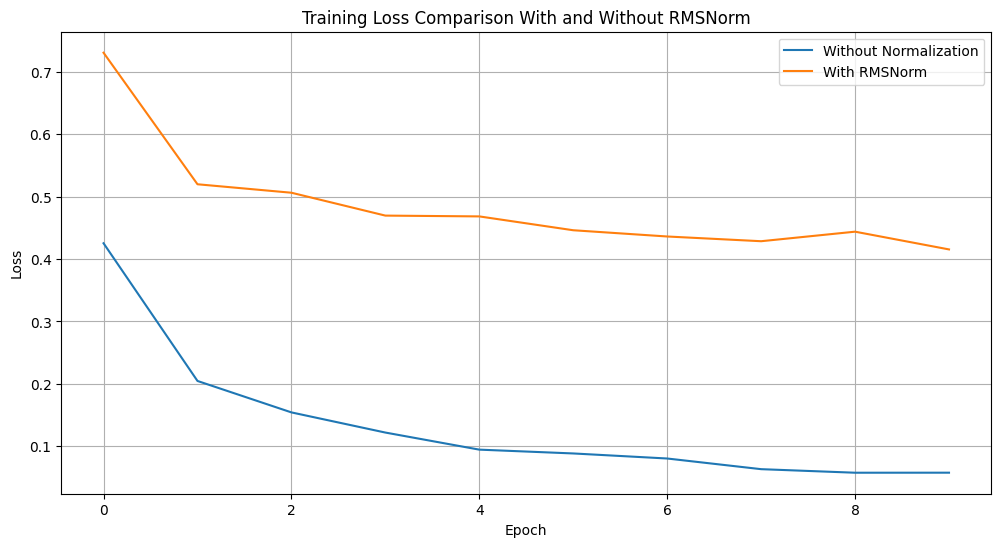

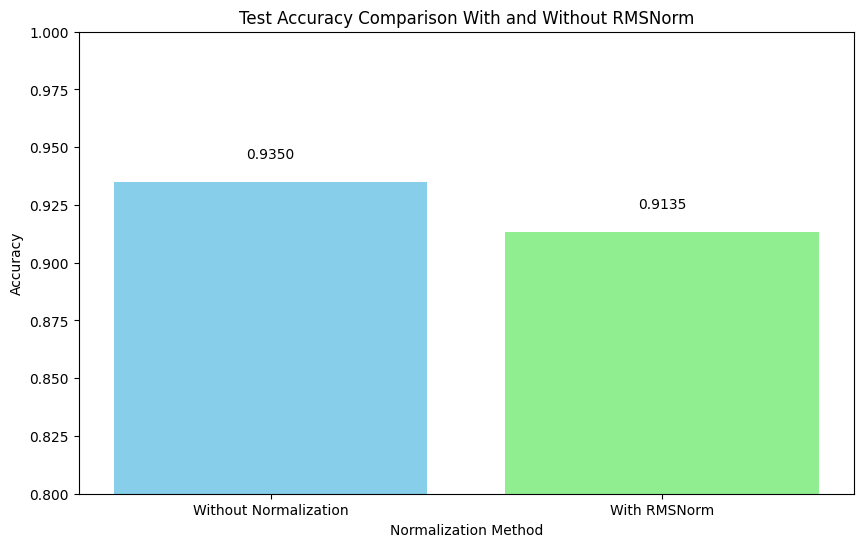

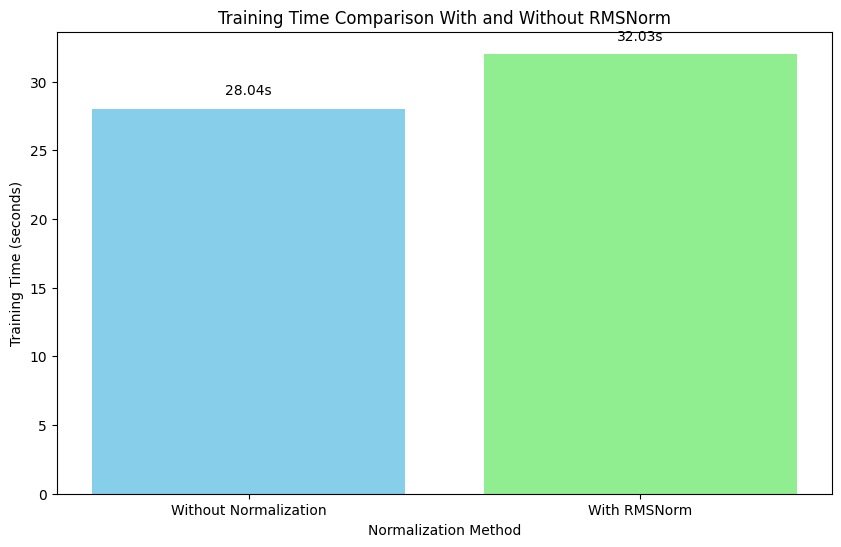

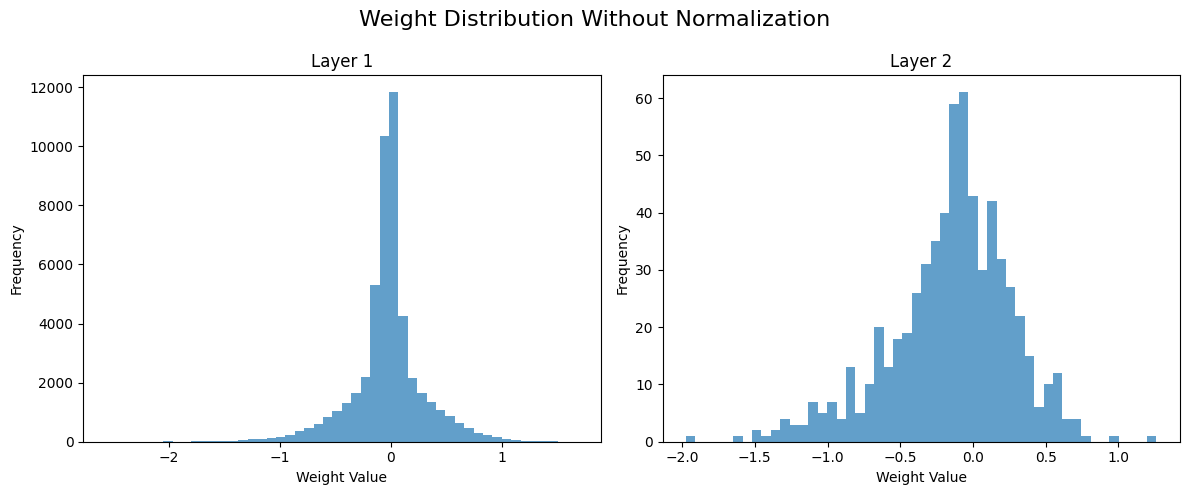

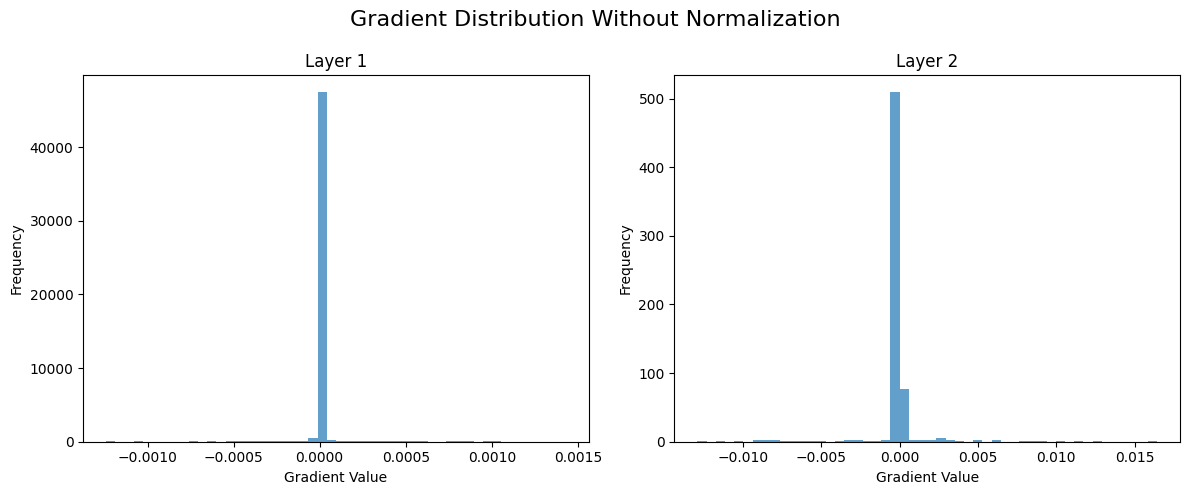

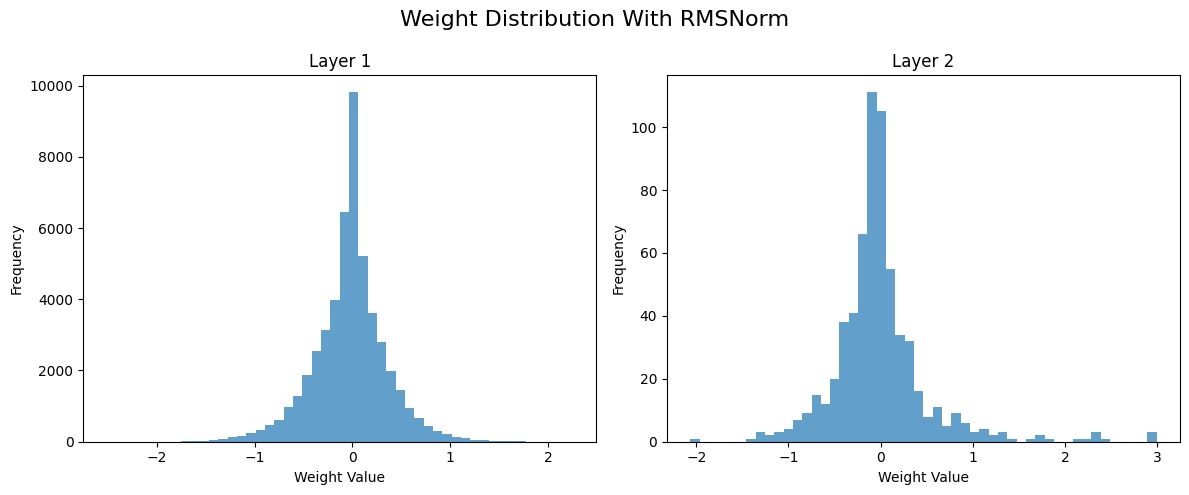

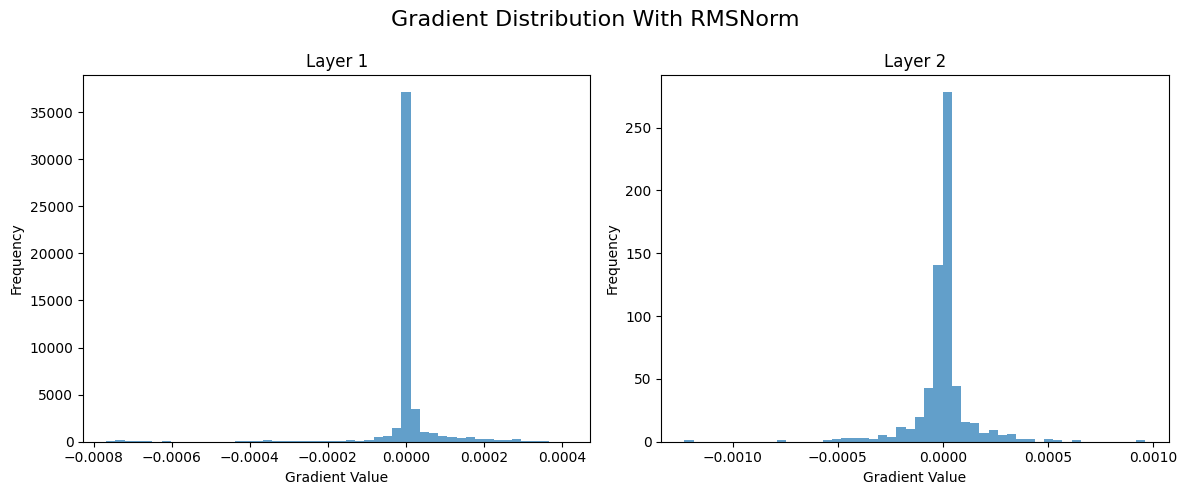

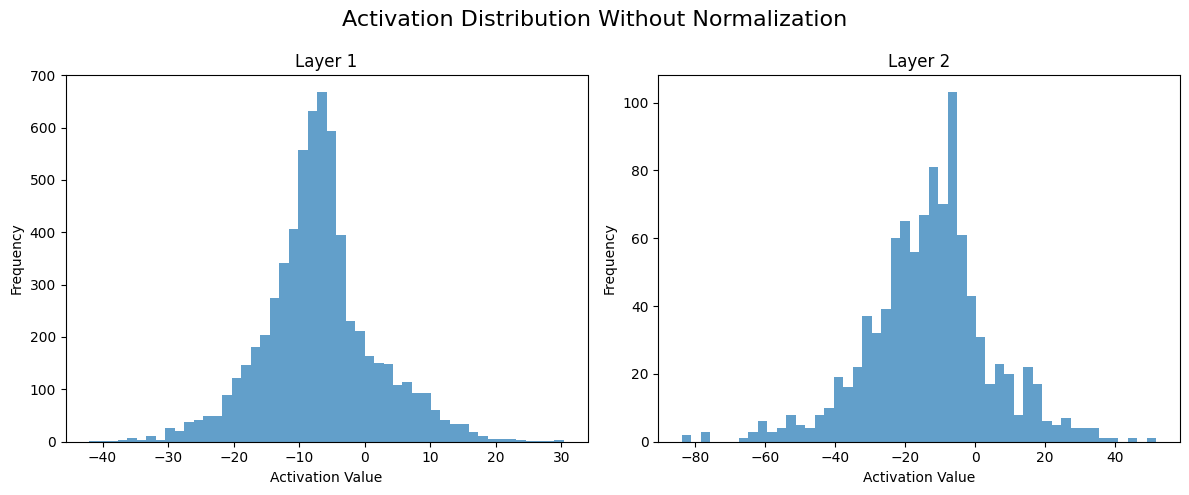

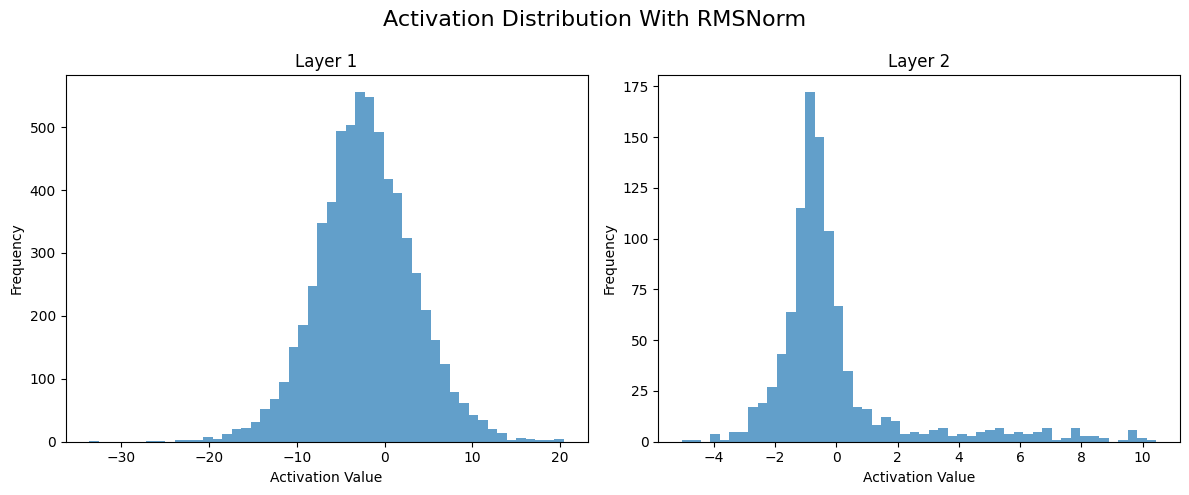

In [6]:
# Load MNIST dataset
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data(subset_size=10000)

input_size = X_train.shape[1]  # 784 for MNIST
output_size = y_train_onehot.shape[1]  # 10 for MNIST
hidden_size = 64  # Fixed hidden layer size for all experiments

# Experiment configs
epochs = 10
batch_size = 32
learning_rate = 0.01

# Test with and without RMSNorm
normalizations = [
    ("Without Normalization", NoNormalization()),
    ("With RMSNorm", RMSNorm(epsilon=1e-8))
]

norm_histories = []
norm_accuracies = []
trained_models = []
training_times = []

for name, normalization in normalizations:
    model_name = f"FFNN {name}"
    print(f"\nTraining model {name}")
    
    model = create_model_with_normalization(input_size, hidden_size, output_size, normalization)
    
    history, accuracy, training_time, trained_model = train_and_evaluate(
        model, X_train, X_test, y_train_onehot, y_test, y_test_onehot,
        epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
        model_name=model_name
    )
    
    norm_histories.append(history)
    norm_accuracies.append(accuracy)
    trained_models.append(trained_model)
    training_times.append(training_time)

# Plot loss curves for both models
plt.figure(figsize=(12, 6))
for i, (name, _) in enumerate(normalizations):
    plt.plot(norm_histories[i]['loss'], label=f'{name}')

plt.title('Training Loss Comparison With and Without RMSNorm')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('../../out/rmsnorm_comparison_loss.png')

# Bar chart of accuracies
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in normalizations], norm_accuracies, color=['skyblue', 'lightgreen'])
plt.title('Test Accuracy Comparison With and Without RMSNorm')
plt.xlabel('Normalization Method')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])  # Adjust y-axis for better visibility
for i, v in enumerate(norm_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.savefig('../../out/rmsnorm_comparison_accuracy.png')

# Bar chart of training times
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in normalizations], training_times, color=['skyblue', 'lightgreen'])
plt.title('Training Time Comparison With and Without RMSNorm')
plt.xlabel('Normalization Method')
plt.ylabel('Training Time (seconds)')
for i, v in enumerate(training_times):
    plt.text(i, v + 1, f"{v:.2f}s", ha='center')
plt.savefig('../../out/rmsnorm_comparison_time.png')

# Plot weight and gradient distributions for each model
for i, (name, _) in enumerate(normalizations):
    model = trained_models[i]
    
    # Plot weight distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Weight Distribution {name}', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        weights = layer.weights.flatten()
        plt.hist(weights, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/rmsnorm_{i}_weight_dist.png')
    
    # Plot gradient distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Gradient Distribution {name}', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        gradients = layer.weights_grad.flatten()
        plt.hist(gradients, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Gradient Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/rmsnorm_{i}_gradient_dist.png')

# Plot activation distributions
for i, (name, _) in enumerate(normalizations):
    model = trained_models[i]
    
    # Get a batch of data to test activations
    batch_indices = np.random.choice(len(X_test), min(100, len(X_test)), replace=False)
    batch_X = X_test[batch_indices]
    
    # Forward pass to collect activations
    activations = []
    output = batch_X
    for layer in model.layers:
        output = layer.forward(output)
        activations.append(layer.output_before_activation.flatten())
    
    # Plot activation distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Activation Distribution {name}', fontsize=16)
    
    for j, activation in enumerate(activations):
        plt.subplot(1, len(activations), j+1)
        plt.hist(activation, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Activation Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/rmsnorm_{i}_activation_dist.png')

In [7]:
print("\nACCURACY RESULTS:")
for i, (name, _) in enumerate(normalizations):
    print(f"{name}: {norm_accuracies[i]:.4f}")

print("\nTRAINING TIME RESULTS:")
for i, (name, _) in enumerate(normalizations):
    print(f"{name}: {training_times[i]:.2f} seconds")

accuracy_diff = abs(norm_accuracies[1] - norm_accuracies[0])
time_diff = abs(training_times[1] - training_times[0])

print(f"\nAccuracy difference: {accuracy_diff:.4f}")
print(f"Training time difference: {time_diff:.2f} seconds")


ACCURACY RESULTS:
Without Normalization: 0.9350
With RMSNorm: 0.9135

TRAINING TIME RESULTS:
Without Normalization: 28.04 seconds
With RMSNorm: 32.03 seconds

Accuracy difference: 0.0215
Training time difference: 3.99 seconds
